# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./
# !unzip dataset.zip

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

## PREPROCESSING

In [149]:
import numpy as np
import cv2
from skimage.filters import unsharp_mask
from matplotlib import pyplot as plt
import re

In [251]:
def show_denoising(img, k_size, sigma, show):

    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    median = cv2.medianBlur(img, 5)

    median_7 = cv2.medianBlur(img, 7)
    

    #cv2.bilateralFilter(img, filter_size, sigmaColor, sigmaSpace)
    bilateral = cv2.bilateralFilter(img, 5, 200, 75)

    bilateral_median = cv2.bilateralFilter(median, 5, 150, 75)

    dst_median = cv2.fastNlMeansDenoisingColored(median,None,10,10,7,21)

    bilateral_median7 = cv2.bilateralFilter(median_7, 5, 150, 75)

    dst_median7 = cv2.fastNlMeansDenoisingColored(median_7,None,10,10,7,21)
    
    
    sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
    sharpened_image = cv2.filter2D(img, -1, sharpening_kernel)

    

    if show:
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
        
        # Plot each image in its corresponding subplot
        axes[0, 0].imshow(img)
        axes[0, 0].set_title('Original')
        axes[0, 1].imshow(bilateral)
        axes[0, 1].set_title('bilateral')
        axes[1, 0].imshow(bilateral_median)
        axes[1, 0].set_title('bilateral_median')
        axes[1, 1].imshow(dst_median)
        axes[1, 1].set_title('dst_median')
        axes[0, 2].imshow(bilateral_median7)
        axes[0, 2].set_title('bilateral_median7')
        axes[1, 2].imshow(dst_median7)
        axes[1, 2].set_title('dst_median7')
        plt.savefig('./dataset/denoising.png')
        plt.show()
    return dst_median7

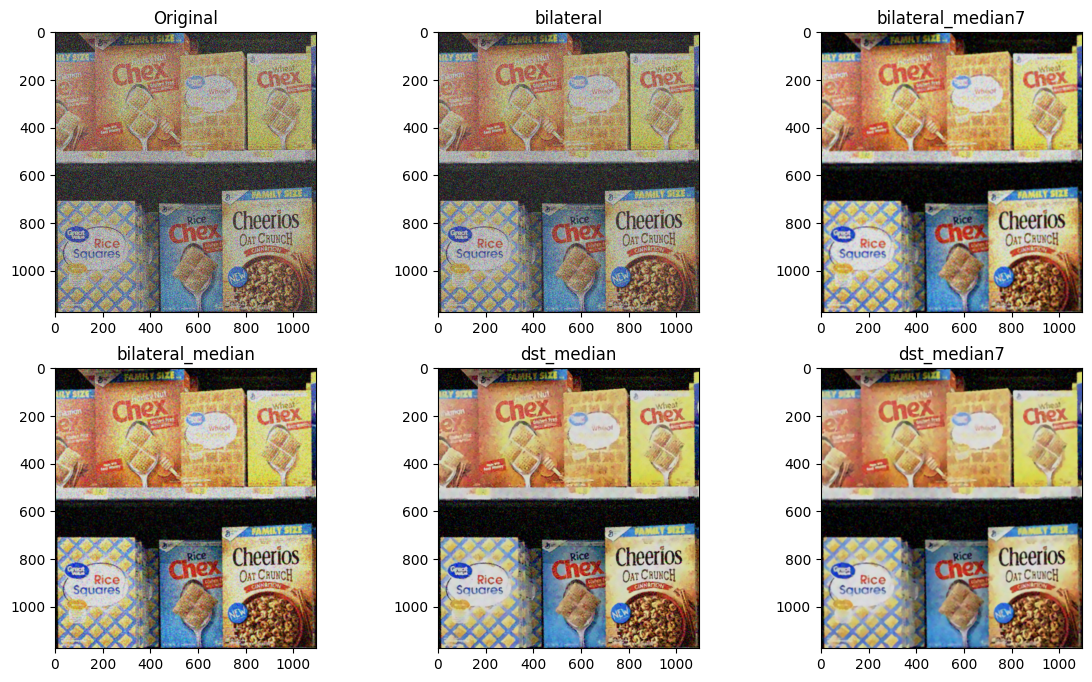

In [203]:
#scene1_dn = show_denoising(scene1_rgb, 5, 1.5, True)
scene1_dn = show_denoising('./dataset/scenes/scene4.png', 9, 3, True)


In [242]:
def extract_number(string):
    # Using regex to find numbers in the string
    numbers = re.findall(r'\d+', string)
    # Returning the first number found (if any)
    return int(numbers[0]) if numbers else None

In [248]:
#Save a denoised version of each background
def denoise_scenes(img_path, kind):
    #####BEFORE RUNNING THIS CREATE A 'denoised_scenes' folder inside 'dataset'
    img= cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_index= extract_number(img_path)

    median = cv2.medianBlur(img, 5)
    if kind=='dst':
        img = cv2.fastNlMeansDenoisingColored(median,None,10,10,7,21)
    elif kind=='bilateral':
        img = cv2.bilateralFilter(median, 5, 150, 75)

    img_write = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    cv2.imwrite(f'./dataset/denoised_scenes/scene{img_index}.png', img_write)



In [249]:
scenes=['./dataset/scenes/scene1.png', './dataset/scenes/scene2.png', './dataset/scenes/scene3.png',
        './dataset/scenes/scene4.png', './dataset/scenes/scene5.png']

for scene in scenes:
    denoise_scenes(scene, 'bilateral')

In [217]:
dn_scenes=['./dataset/denoised_scenes/scene1.png', './dataset/denoised_scenes/scene2.png', './dataset/denoised_scenes/scene3.png',
        './dataset/denoised_scenes/scene4.png', './dataset/denoised_scenes/scene5.png']

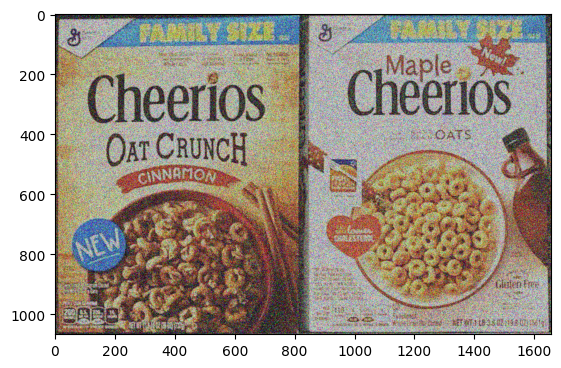

In [92]:
scene1_img = cv2.imread('./dataset/scenes/scene1.png')
scene1_rgb = cv2.cvtColor(scene1_img, cv2.COLOR_BGR2RGB)
plt.imshow(scene1_rgb)
plt.show()

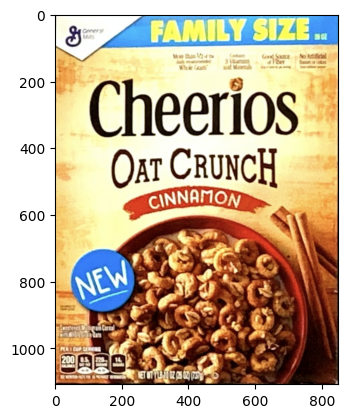

In [94]:
obj_image = cv2.imread('./dataset/models/ref1.png')
obj_rgb = cv2.cvtColor(obj_image, cv2.COLOR_BGR2RGB)

plt.imshow(obj_rgb)
plt.show()

### Keypoint + Descriptor Detection

Query -> the obj to look for in the image \
Train -> background image to locate objs into

Number of Keypoints Obj: 3762
Number of Keypoints Scene: 33451


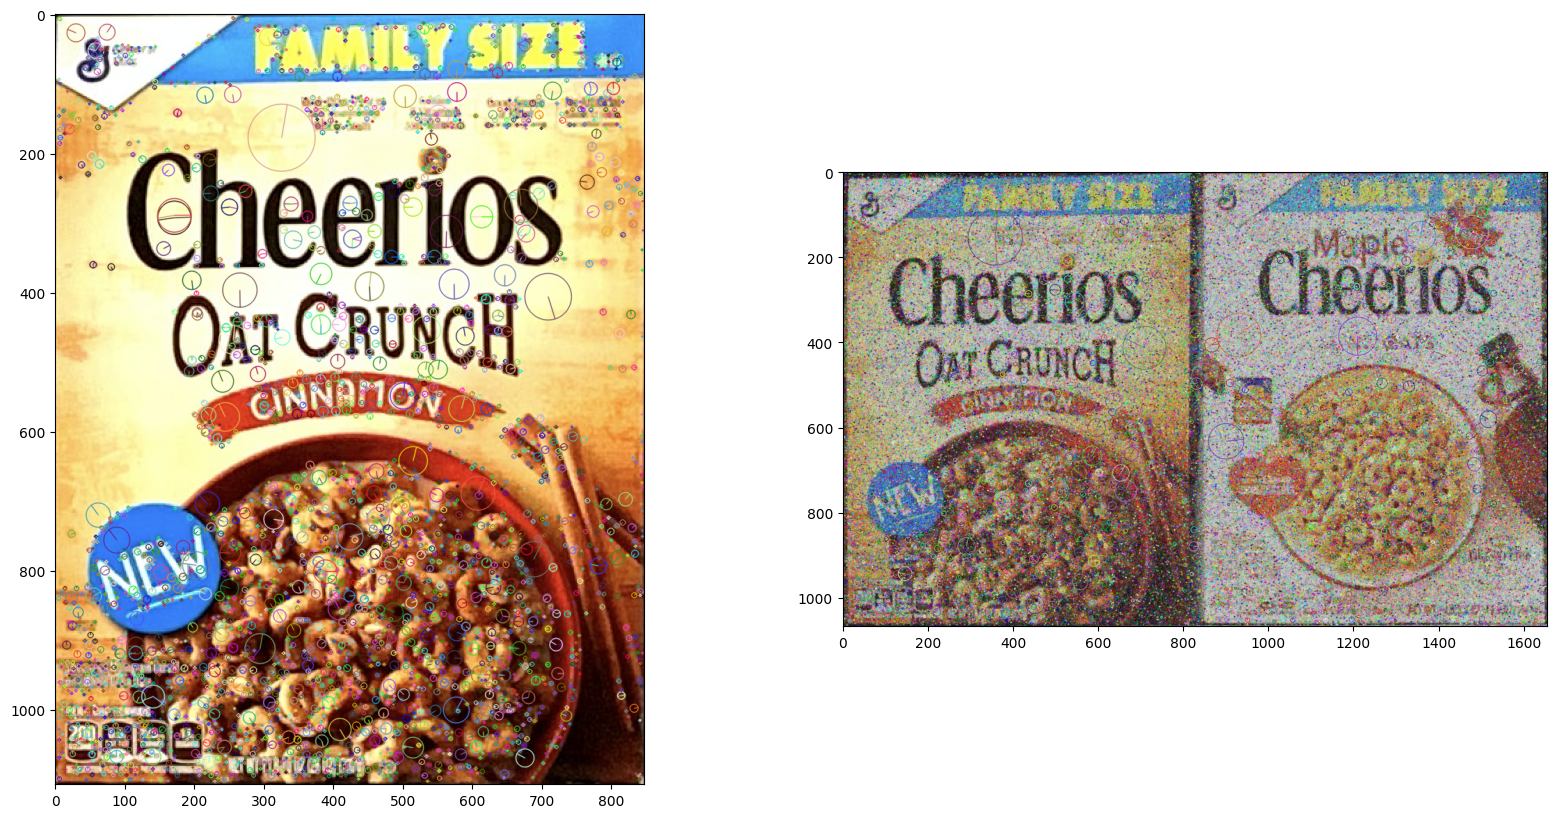

In [95]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

kp_obj = sift.detect(obj_rgb)
kp_scene = sift.detect(scene1_dn)

# find the keypoints and descriptors with SIFT
kp_obj, des_obj = sift.compute(obj_rgb, kp_obj)
kp_scene, des_scene = sift.compute(scene1_dn, kp_scene)

# Number of keypoints
print(f'Number of Keypoints Obj: {len(kp_obj)}')
print(f'Number of Keypoints Scene: {len(kp_scene)}')

#Visualizing the keypoints on the img
obj_visualization = cv2.drawKeypoints(obj_rgb, kp_obj, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scene_visualization = cv2.drawKeypoints(scene1_dn, kp_scene, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(obj_visualization)

plt.subplot(1,2,2)
plt.imshow(scene_visualization)

plt.show()

In [96]:
# Defining index for approximate kdtree algorithm
FLANN_INDEX_KDTREE = 1

# Defining parameters for algorithm
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

# Defining search params.
# checks=50 specifies the number of times the trees in the index should be recursively traversed.
# Higher values gives better precision, but also takes more time
search_params = dict(checks = 50)

# Initializing matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Matching and finding the 2 closest elements for each query descriptor.
matches = flann.knnMatch(des_obj,des_scene,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [105]:
# Checking if we found enough matching
MIN_MATCH_COUNT = 10

if len(good)>MIN_MATCH_COUNT:
    
    # building the corrspondences arrays of good matches
    src_pts = np.float32([ kp_obj[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    # Using RANSAC to estimate a robust homography.
    # It returns the homography M and a mask for the discarded points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Mask of discarded point used in visualization
    matchesMask = mask.ravel().tolist()

    # Corners of the query image
    h,w,c = obj_rgb.shape
    print(h,w,c)
    pts = np.float32([ [0,0,],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

    # Projecting the corners into the train image
    dst = cv2.perspectiveTransform(pts,M)
    print(dst[0])
    # Drawing the bounding box
    img_train_p = cv2.polylines(scene1_dn,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

print(len(good))

1108 848 3
[[10.810684 14.490548]]
472


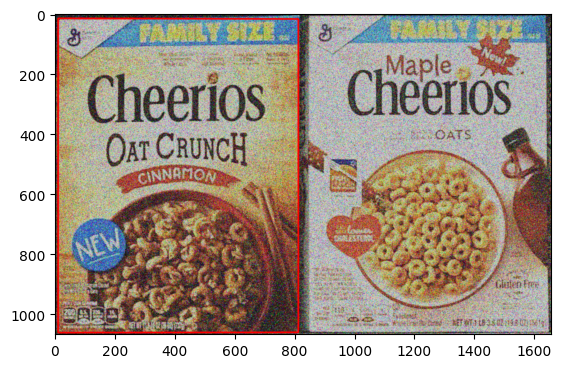

In [85]:
plt.imshow(img_train_p, 'gray')
plt.show()

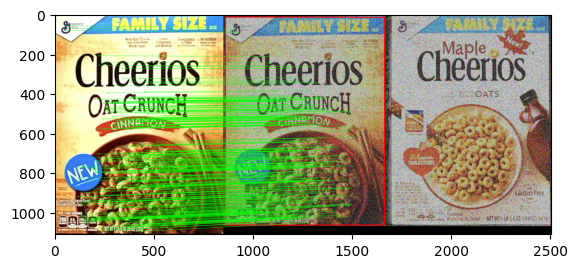

In [12]:
# Drawing the matches
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None, # not draw keypoints only matching lines
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2) # not draw keypoints only lines
img3 = cv2.drawMatches(obj_rgb,kp_obj,scene1_dn,kp_scene,good,None,**draw_params)
plt.imshow(img3, 'gray')
plt.show()

## AOOOOO

In [237]:
def check_matching(img_obj_path, img_scene_path, treshold):
    
    img_ob = cv2.imread(img_obj_path)
    img_obj = cv2.cvtColor(img_ob, cv2.COLOR_BGR2RGB)

    scene_ob = cv2.imread(img_scene_path)
    img_scene = cv2.cvtColor(scene_ob, cv2.COLOR_BGR2RGB)

    sift =cv2.SIFT_create()
    kp_query = sift.detect(img_obj)
    kp_train =sift.detect(img_scene)
    kp_query, des_query = sift.compute(img_obj, kp_query)
    kp_train, des_train = sift.compute(img_scene, kp_train)

    #treshold_percentage = len(kp_query) * treshold

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des_query, des_train, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append(m)

    if len(good) > treshold:
        print(f'{img_obj_path} present in {img_scene_path}')
        
        # building the correspondences arrays of good matches
        src_pts = np.float32([kp_query[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp_train[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        # Using RANSAC to estimate a robust homography.
        # It returns the homography M and a mask for the discarded points
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Mask of discarded point used in visualization
        matchesMask = mask.ravel().tolist()

        # Corners of the query image
        h, w,c = img_obj.shape
        pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

        # Projecting the corners into the train image
        dst = cv2.perspectiveTransform(pts, M)
         
        ret_array=[h,w, dst[0][0]]       
        return ret_array
    else:
        #print(f'Not enough matches are found - {len(good)}/{treshold_percentage}')
        return []


In [219]:
def show_output(prod_instances):
    
    for product in prod_instances:
        
        print(f"Product: {product['name']} - {product['count']}")
        for instance in product['instances']:
            print(f'\t Instance {34} - position: {instance[2]}, width: {instance[1]} px, height:{instance[0]}px, scene:{instance[3]}')



In [226]:
scenes=['./dataset/scenes/scene1.png', './dataset/scenes/scene2.png', './dataset/scenes/scene3.png',
        './dataset/scenes/scene4.png', './dataset/scenes/scene5.png']

models_path = './dataset/models/ref'
start_index = 1
end_index = 14

# Generate the array of file paths
objs = [f"{models_path}{i}.png" for i in range(start_index, end_index + 1)]

# Print the generated array
print(objs)

['./dataset/models/ref1.png', './dataset/models/ref2.png', './dataset/models/ref3.png', './dataset/models/ref4.png', './dataset/models/ref5.png', './dataset/models/ref6.png', './dataset/models/ref7.png', './dataset/models/ref8.png', './dataset/models/ref9.png', './dataset/models/ref10.png', './dataset/models/ref11.png', './dataset/models/ref12.png', './dataset/models/ref13.png', './dataset/models/ref14.png']


In [ ]:
prod_instances=[]
for obj in objs:
    prod_description={}
    obj_instances=[]
    prod_description['name'] = extract_number(obj)
    for scene in dn_scenes:
        ret_array= check_matching(obj, scene, 80)
        
        
        #heigth, width, pos = check_matching(obj, scene, 0.027)
        if(len(ret_array)>0):
            ret_array.append(extract_number(scene))
            obj_instances.append(ret_array)
            #print(ret_array)
    prod_description['instances']=obj_instances    
    prod_description['count'] = len(obj_instances)
    prod_instances.append(prod_description)
    #print(f"Name = {prod_description['name']}, Height = {prod_description['instances'][0][0]}, Pos = {prod_description['instances'][0][2]}")
print('###########################')


In [250]:
for scene in dn_scenes:
    for obj in objs:
        ret_array= check_matching(obj, scene, 70)
    print('\n')

./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene1.png
./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene1.png
./dataset/models/ref5.png present in ./dataset/denoised_scenes/scene1.png
./dataset/models/ref14.png present in ./dataset/denoised_scenes/scene1.png


./dataset/models/ref2.png present in ./dataset/denoised_scenes/scene2.png
./dataset/models/ref3.png present in ./dataset/denoised_scenes/scene2.png
./dataset/models/ref4.png present in ./dataset/denoised_scenes/scene2.png
./dataset/models/ref5.png present in ./dataset/denoised_scenes/scene2.png
./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene2.png


./dataset/models/ref6.png present in ./dataset/denoised_scenes/scene3.png
./dataset/models/ref7.png present in ./dataset/denoised_scenes/scene3.png
./dataset/models/ref8.png present in ./dataset/denoised_scenes/scene3.png


./dataset/models/ref1.png present in ./dataset/denoised_scenes/scene4.png
./dataset/models/ref8.png prese

In [ ]:
show_output(prod_instances)